# Olympic Swimming Visualized 

### Import Libraries

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

olympic_data = pd.read_csv(r'C:\Users\12092\Desktop\Olympic_Swimming_Results_1912to2020.csv')
olympic_data

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4354,Stockholm,1912,4x100,Freestyle,1,Women,SWE,"Greta Carlsson, Vera Thulin, Sonja Johnsson, G...",NaN,5
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


### What Olympian has the Most Individual Gold Medals?

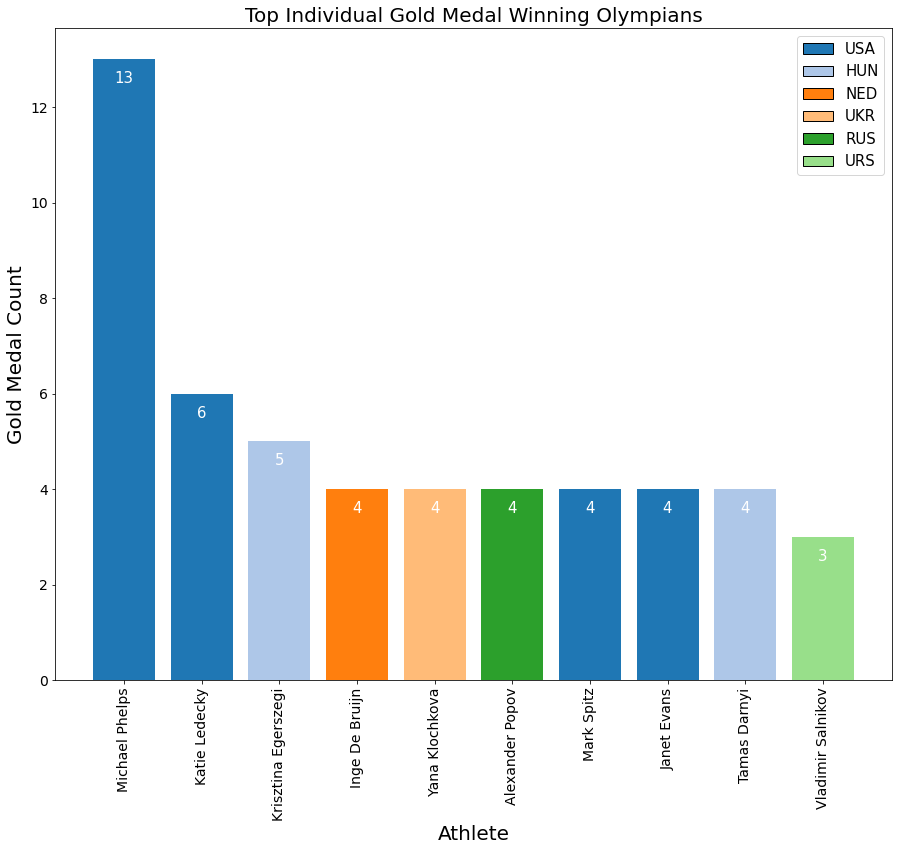

In [237]:
# Organize and CLean Data
gold_medals_pd = olympic_data[olympic_data['Rank'] == 1]
gold_medal_table = pd.pivot_table(gold_medals_pd, values=['Rank', 'Team'], index='Athlete', aggfunc={'Rank': 'sum', 'Team': 'first'})
gold_medal_df = gold_medal_table.reset_index()
gold_medal_df = gold_medal_df.sort_values('Rank', ascending=False)
gold_medal_df = gold_medal_df[:10].reset_index(drop=True)

#Create Bar Graph

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]

gold_medal_df = gold_medal_df.set_index('Athlete')
color_dict = {val: plt.cm.tab20(i) for i, val in enumerate(gold_medal_df['Team'].unique())}

fig, ax = plt.subplots()
ax.bar(gold_medal_df.index, gold_medal_df['Rank'], color=gold_medal_df['Team'].map(color_dict))
legend_elements = [Patch(facecolor=color_dict[val], edgecolor='black', label=val) for val in gold_medal_df['Team'].unique()]
ax.legend(handles=legend_elements, fontsize=15)

# Add text annotations to the bars
for i in range(len(gold_medal_df.index)):
    ax.text(gold_medal_df.index[i], gold_medal_df['Rank'][i] - .5, str(gold_medal_df['Rank'][i]), ha='center', fontsize=15, color='white')

ax.set_xlabel('Athlete', fontsize=20)
ax.set_ylabel('Gold Medal Count', fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.title("Top Individual Gold Medal Winning Olympians", fontsize=20)

plt.show()

### What percentage do Golds make up the USA total Medal amount? Compare this to Australia's medal amount.

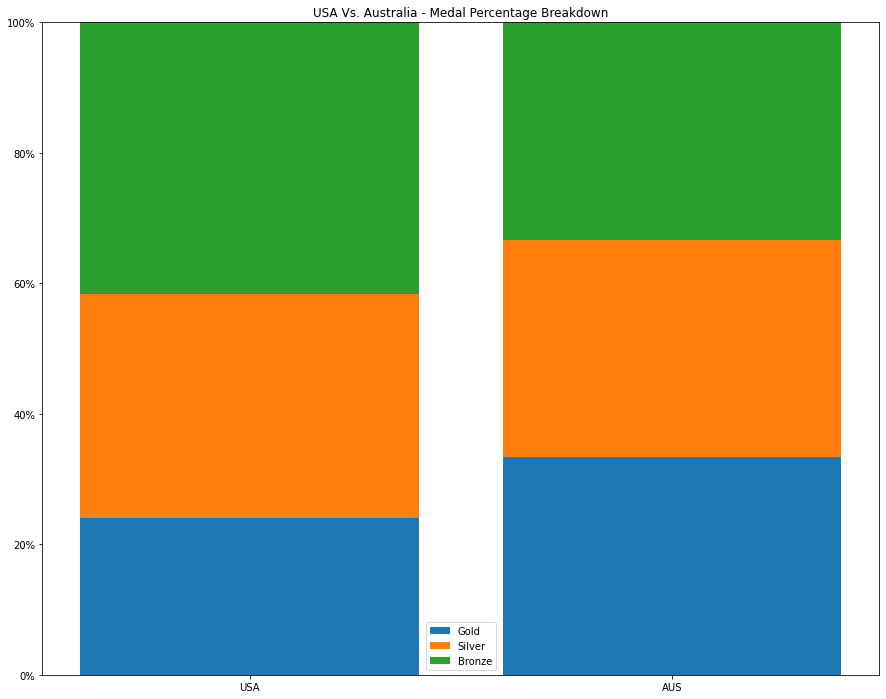

In [238]:
#Clean and Organize Data
usa_df = olympic_data[olympic_data['Team'] == 'USA']
aus_df = olympic_data[olympic_data['Team'] == 'AUS']

usa_gold_df = usa_df[usa_df['Rank'] == 1]
usa_gold_total = usa_gold_df['Rank'].sum()
usa_silver_df = usa_df[usa_df['Rank'] == 2]
usa_silver_total = usa_silver_df['Rank'].sum()
usa_bronze_df = usa_df[usa_df['Rank'] == 3]
usa_bronze_total = usa_bronze_df['Rank'].sum()

aus_gold_df = aus_df[aus_df['Rank'] == 1]
aus_gold_total = aus_gold_df['Rank'].sum()
aus_silver_df = aus_df[aus_df['Rank'] == 2]
aus_silver_total = aus_gold_df['Rank'].sum()
aus_bronze_df = aus_df[aus_df['Rank'] == 3]
aus_bronze_total = aus_gold_df['Rank'].sum()

# Noramlize Data
labels = ['USA', 'AUS']
golds = [usa_gold_total, aus_gold_total]
silvers = [usa_silver_total, aus_silver_total]
bronzes = [usa_bronze_total, aus_bronze_total]

total = np.array(golds) + np.array(silvers) + np.array(bronzes)
gold_means = 100 * np.array(golds) / total
silver_means = 100 * np.array(silvers) / total
bronze_means = 100 * np.array(bronzes) / total

# Create Stacked Bar Chart
fig, ax = plt.subplots()
ax.bar(labels, gold_means, label='Gold')
ax.bar(labels, silver_means, bottom=gold_means, label='Silver')
ax.bar(labels, bronze_means , bottom=gold_means+silver_means, label='Bronze')
ax.yaxis.set_major_formatter(PercentFormatter())

plt.title('USA Vs. Australia - Medal Percentage Breakdown')
plt.legend()
plt.ylim(0, 100)

plt.show()

### Have Women's 100 meter Breaststroke Times Increased or Decreased?

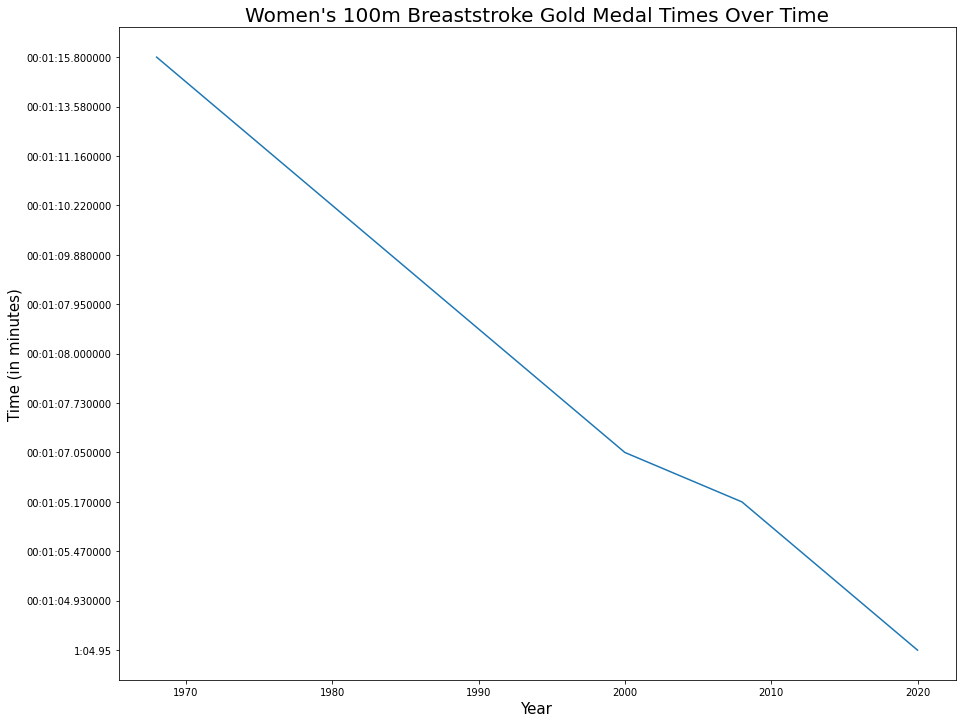

In [239]:
#Clean and Organize Data
breaststroke_hist_df = olympic_data.drop(olympic_data[olympic_data.Stroke != 'Breaststroke'].index)
breaststroke_hist_df = freestyle_hist_df.drop(freestyle_hist_df[freestyle_hist_df.Rank != 1].index)
breaststroke_hist_df = freestyle_hist_df.drop(freestyle_hist_df[freestyle_hist_df['Distance (in meters)'] != '100m'].index)
breaststroke_hist_df = freestyle_hist_df.drop(freestyle_hist_df[freestyle_hist_df.Gender != 'Women'].index).reset_index()

#Create Graph
plt.plot(breaststroke_hist_df['Year'], breaststroke_hist_df['Results'])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Time (in minutes)', fontsize=15)
plt.title("Women's 100m Breaststroke Gold Medal Times Over Time", fontsize=20)
plt.show()